In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# Reading a CSV file
books = pd.read_csv('clean_books.csv')

### Intro to Exploratory Data Analysis

In [10]:
books.head()

name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  rating  year        genre  
0                  JJ Smith     4.7  2016  Non Fiction  
1              Stephen King     4.6  2011      Fiction  
2        Jordan B. Peterson     4.7  2018  Non Fiction  
3             George Orwell     4.7  2017      Fiction  
4  National Geographic Kids     4.8  2019    Childrens

In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [14]:
books.describe()

rating         year
count  350.000000   350.000000
mean     4.608571  2013.508571
std      0.226941     3.284711
min      3.300000  2009.000000
25%      4.500000  2010.000000
50%      4.600000  2013.000000
75%      4.800000  2016.000000
max      4.900000  2019.000000

books.value_counts("genre")

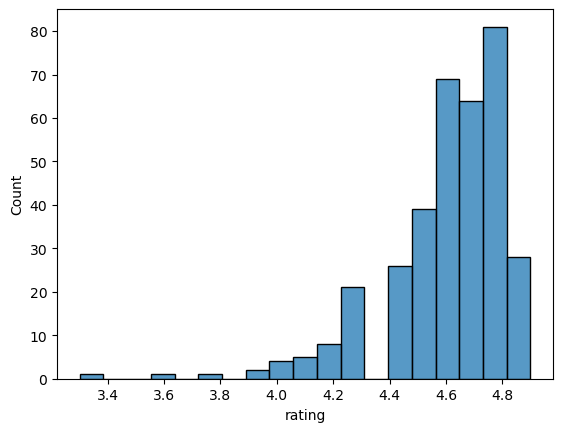

In [18]:
sns.histplot(data=books, x="rating")
plt.show()

### Adjusting Bin Width? See the difference

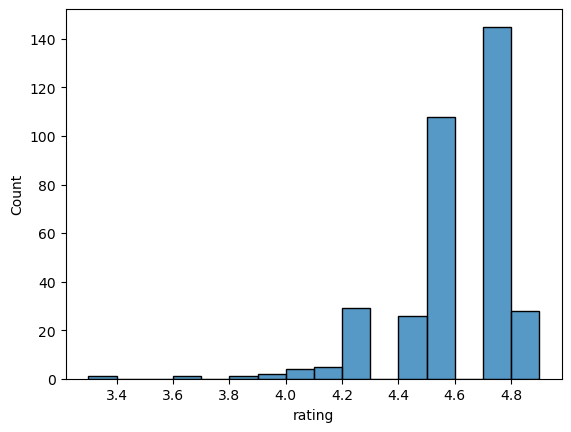

In [23]:
sns.histplot(data=books, x="rating", binwidth=.1)
plt.show()

In [25]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

### Need to update any data type?

In [28]:
books["year"] = books["year"].astype(int)
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

# Data validation

## Validating categorical data

In [33]:
# Fiction & Non Fiction Books
books["genre"].isin(["Fiction","Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [35]:
# NOT Fiction & NOT Non Fiction Books
~books["genre"].isin(["Fiction","Non Fiction"])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

In [37]:
books[books["genre"].isin(["Fiction","Non Fiction"])].head()

name               author  rating  \
0                  10-Day Green Smoothie Cleanse             JJ Smith     4.7   
1                              11/22/63: A Novel         Stephen King     4.6   
2        12 Rules for Life: An Antidote to Chaos   Jordan B. Peterson     4.7   
3                         1984 (Signet Classics)        George Orwell     4.7   
5  A Dance with Dragons (A Song of Ice and Fire)  George R. R. Martin     4.4   

   year        genre  
0  2016  Non Fiction  
1  2011      Fiction  
2  2018  Non Fiction  
3  2017      Fiction  
5  2011      Fiction

### Validating numerical data

In [40]:
books.select_dtypes("number").head()

rating  year
0     4.7  2016
1     4.6  2011
2     4.7  2018
3     4.7  2017
4     4.8  2019

In [46]:
print(books["year"].min())
print(books["year"].max())

2009
2019


In [50]:
books

name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
345  Wild: From Lost to Found on the Pacific Crest ...   
346  Winter of the World: Book Two of the Century T...   
347  Women Food and God: An Unexpected Path to Almo...   
348                                             Wonder   
349       Wrecking Ball (Diary of a Wimpy Kid Book 14)   

                       author  rating  year        genre  
0                    JJ Smith     4.7  2016  Non Fiction  
1                Stephen King     4.6  2011      Fiction  
2          Jordan B. Peterson     4.7  2018  Non Fiction  
3               George Orwell     4.7  2017      Fiction  
4    National Geographic Kids     4.8  2019    Childrens  
..                        ...     ...   ...          ...  
345            Cheryl Strayed     4.4  2012  Non Fiction  
346               Ken Follett     4.5  2012      Fiction  
347               Geneen Roth     4.2  2010  Non Fiction  
348             R. J. Palacio     4.8  2013      Fiction  
349               Jeff Kinney     4.9  2019    Childrens  

[350 rows x 5 columns]

In [54]:
books["year"].describe()

count     350.000000
mean     2013.508571
std         3.284711
min      2009.000000
25%      2010.000000
50%      2013.000000
75%      2016.000000
max      2019.000000
Name: year, dtype: float64

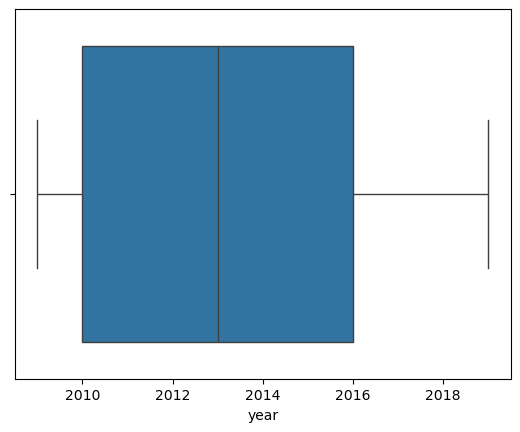

In [48]:
sns.boxplot(data=books, x="year")
plt.show()

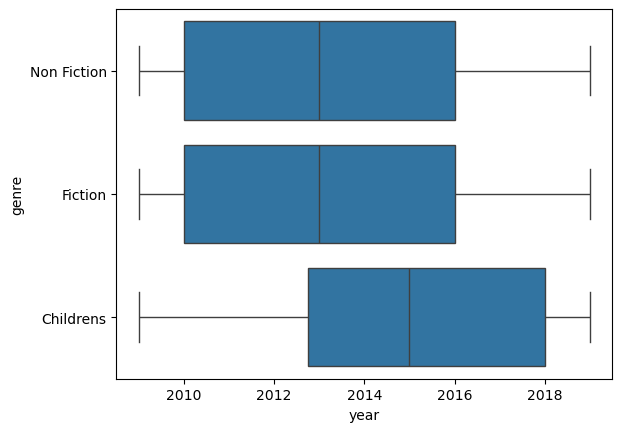

In [58]:
sns.boxplot(data=books, x="year",y="genre")
plt.show()

# Data summarization

### Group By & Aggregating

In [73]:
books.groupby("genre").mean(numeric_only=True) # working only on numeric columns

rating         year
genre                             
Childrens    4.780000  2015.075000
Fiction      4.570229  2013.022901
Non Fiction  4.598324  2013.513966

### Aggregating ungrouped data

In [77]:
books.select_dtypes(include=np.number).agg(["mean", "std"]) # selecting on numeric dtypes

rating         year
mean  4.608571  2013.508571
std   0.226941     3.284711

### Specifying aggregations for columns

In [81]:
books.agg({"rating": ["mean","std"],"year": ["median"]})

rating    year
mean    4.608571     NaN
std     0.226941     NaN
median       NaN  2013.0

### Named summary columns

In [88]:
books.groupby("genre").agg(
    mean_rating=("rating","mean"),
    std_rating=("rating","std"),
    median_year=("year","median")
)

mean_rating  std_rating  median_year
genre                                            
Childrens       4.780000    0.122370       2015.0
Fiction         4.570229    0.281123       2013.0
Non Fiction     4.598324    0.179411       2013.0

### Visualizing categorical summaries

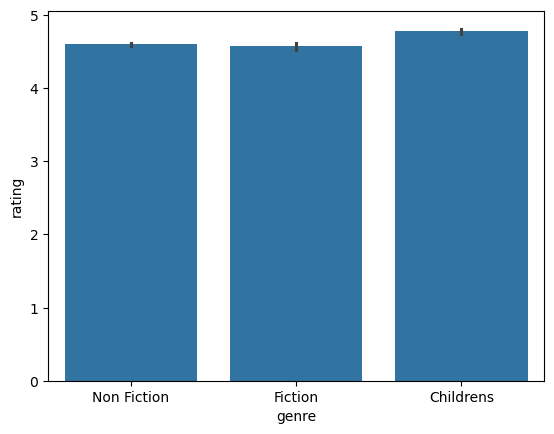

In [91]:
sns.barplot(data=books, x="genre", y="rating")
plt.show()

# Task

In [98]:
# Reading a CSV file
unemployment  = pd.read_csv('clean_unemployment.csv')

### Task 1: Use head(), info(), describe(), dtypes to get basic understanding of the data
DataFrame contains 182 rows of country data including country_code, country_name, continent, and unemployment percentages from 2010 through 2021.

### Task 2
Use a method to count the values associated with each continent in the unemployment DataFrame.

### Task 3
Create a histogram of the distribution of 2021 unemployment percentages across all countries in unemployment; show a full percentage point in each bin using seaborn

### Task 4
A column has been changed in the unemployment DataFrame and it now has the wrong data type! This data type will stop you from performing effective exploration and analysis, so your task is to identify which column has the wrong data type and then fix it.
* your task is to find the column having wring data type. Write your answer in comment

### Task 5
Define a Series of Booleans describing continent which is outside of ***Oceania***; call this Series not_oceania.

### Task 6
Print the minimum and maximum unemployment rates during 2021.

### Task 7
Your task in this exercise is to get much more detailed information about the range of unemployment data using Seaborn's boxplot, and you'll also visualize the range of unemployment rates in each continent to understand geographical range differences.
* Create a boxplot of 2021 unemployment rates (on the x-axis), broken down by continent (on the y-axis).

***Notice how different the ranges in unemployment are between continents. For example, Africa's 50th percentile is lower than that of North America, but the range is much wider.***

### Task 8
Print the mean and standard deviation of the unemployment rates for each year

### Task 9
Print the mean and standard deviation of the unemployment rates for each year, grouped by continent.

### Task 10
* Create a column called mean_rate_2021 which shows the mean 2021 unemployment rate for each continent.
* Create a column called std_rate_2021 which shows the standard deviation of the 2021 unemployment rate for each continent.

In [ ]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ,
    # Create the std_rate_2021 column
    std_rate_2021 = 
)
print(continent_summary)

### Task 11
Create a bar plot showing continents on the x-axis and their respective average 2021 unemployment rates on the y-axis.
* bar plot in seaborn by default shows the average

## Data Cleaning & Imputation 

In [142]:
# Reading a CSV file
planes = pd.read_csv('planes.csv')
planes.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

### Dealing with missing values 

* Checking for missing values
* Calculate how many observations five percent of the planes DataFrame is equal to.
* Create cols_to_drop by applying boolean indexing to columns of the DataFrame with missing values less than or equal to the threshold.
* Use this filter to remove missing values and save the updated DataFrame.

### Droping missing values if:
    * 5% or less of total values

In [164]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05  # if missing valu

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


### Task 12
* Print the values and frequencies of "Additional_Info" ***Hint:*** ***value_counts***
* Create a boxplot of y = "Price" versus x = "Airline".

### Imputing by sub-group

### Task 13
* Group planes by airline and calculate the median price.
* Convert the grouped median prices to a dictionary. ***Done with:to_dict()***
* Conditionally impute missing values for "Price" by mapping values in the "Airline" column based on prices_dict.
* Check for remaining missing values.

In [ ]:
# Calculate median plane ticket prices by Airline
airline_prices = 

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict() # already done

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

### Converting and analyzing categorical data

### Task 14
* Filter planes for columns that are of "object" data type.
* Loop through the columns in the dataset.
* Add the column iterator to the print statement, then call the function to return the number of unique values in the column.

In [ ]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("what should be here?")
# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

## Dealing with outliers

### Task 15
* Plot the distribution (Histogram) of "Price" column from planes.
* Display the descriptive (describe()) statistics for flight duration.
* Which column potentially contains outliers? Write your answer in comment

### Removing outliers

### Task 16
* Find the 75th and 25th percentiles, saving as price_seventy_fifth and price_twenty_fifth respectively.
* Calculate the IQR, storing it as prices_iqr
* Calculate the upper and lower outlier thresholds.
* Remove the outliers from planes.

In [ ]:
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = 

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = 

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

